#### BDA Team Project: 
#### MEERKOSOFT

#### Predictive Analysis: SVM Classification Model


### IMPORT DATASET

In [1]:
import pandas as pd

rawdata = pd.read_excel("./D1_Water Source Consumability.xlsx")

rawdata.shape


(3276, 10)

The data is exported from the excel sheet and the shape of it before preperation is 3,276 rows and 10 columns.

### DESCRIBE DATA & DATA CLEANSING

In [2]:
# check for missing values
rawdata.isna().sum()

ph          491
hardness      0
tds           0
cl            0
thm         162
sulfate     781
conduct       0
carbon        0
turbid        0
consume       0
dtype: int64

Findings show that there are three columns with multiple missing values. Below is a summery of missing values along with proposed solution on how to resolve the problem for each column. The colomns are sorted by the method that will be used.

|Column      |Number of missing values| Method to clean| 
| - | - |-|
|sulfate     |781|Remove Row|
|ph          |491|Average filling|
|thm         |162|Backwards filling|



In [3]:
#Remove Rows
rawdata = rawdata[rawdata['sulfate'].notna()]

#Average filling
rawdata['ph'].fillna(value=rawdata['ph'].mean(), inplace=True)

#Backwards filling
rawdata.loc[:,'thm'] = rawdata.loc[:,'thm'].bfill()

rawdata.isna().sum()

ph          0
hardness    0
tds         0
cl          0
thm         0
sulfate     0
conduct     0
carbon      0
turbid      0
consume     0
dtype: int64

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 1 to 3275
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ph        2495 non-null   float64
 1   hardness  2495 non-null   float64
 2   tds       2495 non-null   float64
 3   cl        2495 non-null   float64
 4   thm       2495 non-null   float64
 5   sulfate   2495 non-null   float64
 6   conduct   2495 non-null   float64
 7   carbon    2495 non-null   float64
 8   turbid    2495 non-null   float64
 9   consume   2495 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.4 KB


The dataset appears to be fully numerical as float, except for the consume column. The consume colomn appears to be an integer storing a bolean value of 1 or 0 to indicate a true or false value using the integer type.

In [5]:
rawdata.describe()

,ph,hardness,tds,cl,thm,sulfate,conduct,carbon,turbid,consume
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,7.083824,196.213489,22065.860761,7.119219,66.182244,333.775777,425.529584,14.328318,3.967982,0.394790
std,1.460755,32.689075,8763.541797,1.584166,16.097947,41.416840,80.774995,3.308675,0.782624,0.488903
min,0.227499,47.432000,320.942611,0.352000,8.577013,129.000000,201.619737,2.200000,1.450000,0.000000
25%,6.284685,176.855409,15623.966290,6.121563,55.463155,307.699498,365.210558,12.084461,3.435883,0.000000
50%,7.083824,197.142637,21043.626930,7.135063,66.359658,333.073546,421.625238,14.254641,3.965647,0.000000
75%,7.859798,216.421982,27372.857060,8.106435,77.108846,359.950170,481.037109,16.620006,4.506183,1.000000
max,14.000000,317.338124,61227.196010,13.127000,124.000000,481.030642,753.342620,27.006707,6.739000,1.000000


A summery of each column is shown above representing the min and max value of each column from the dataset. the mean, standard deviation and IQR is also shown.

Next, we will elemenate any rows for all columns (except 'consume') that exceed the 3 standard deviation value to remove outlier values.

C:\Users\vEonz\AppData\Local\Temp/ipykernel_262248/2000245660.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outliers = no_outliers[abs(stats.zscore(rawdata[c]) < 3)]


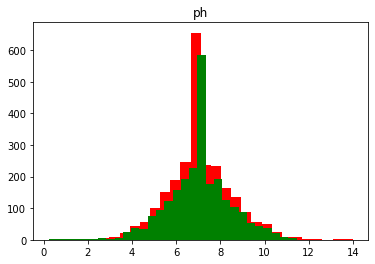

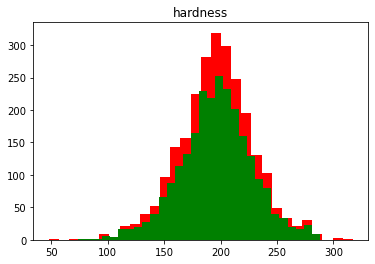

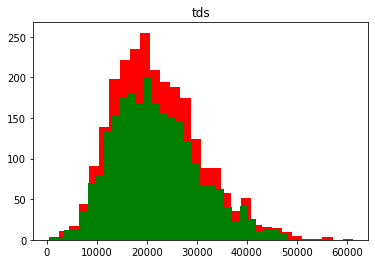

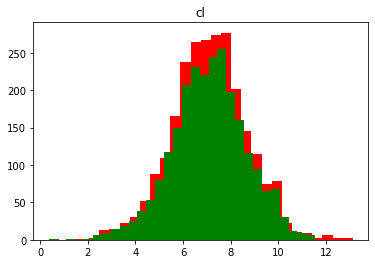

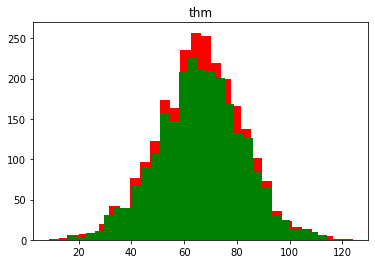

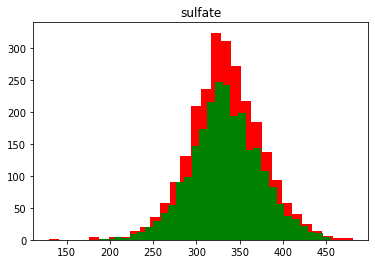

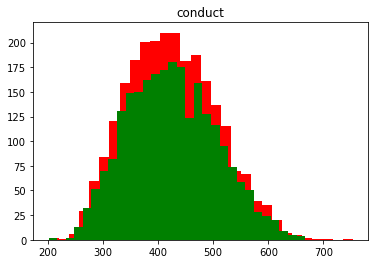

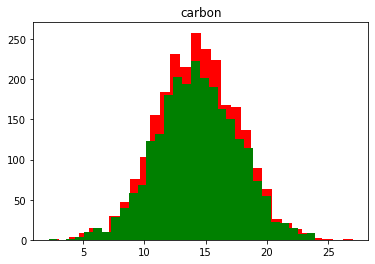

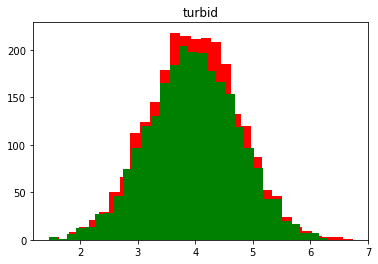

Removed 60 rows.


In [6]:
from scipy import stats
import matplotlib.pyplot as plt
numeric_columns= rawdata.loc[:, :'turbid']

outlier_columns = list(numeric_columns.columns)

no_outliers = rawdata

for c in outlier_columns:
        no_outliers = no_outliers[abs(stats.zscore(rawdata[c]) < 3)]

no_outliers.reset_index(drop=True, inplace=True)  # reset index



# plot pruned columns: visible red has been pruned

for c in outlier_columns:
    plt.hist(rawdata[c], color = 'red', bins = 30)
    plt.hist(no_outliers[c], color = 'green', bins = 30)
    plt.title(c)

    plt.show()
print(f'Removed {rawdata.shape[0] - no_outliers.shape[0]} rows.')

rawdata = no_outliers

This shows that only 60 rows has been removed in total.

Furthermore, all rows with outliers outside the IQR for each column will also be dropped.

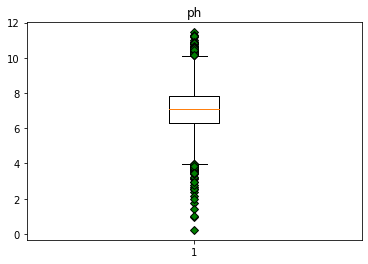

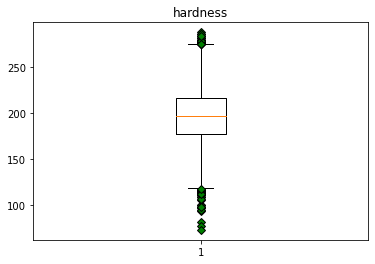

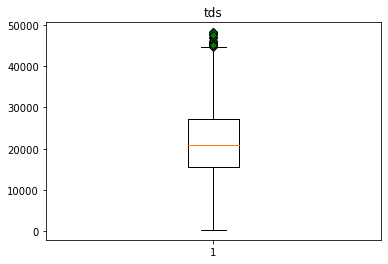

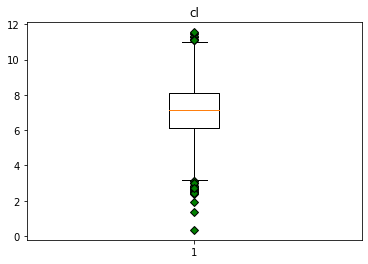

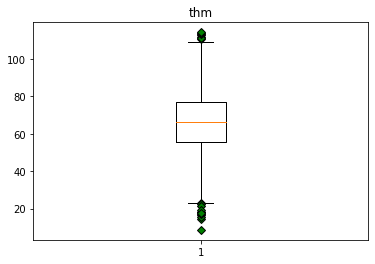

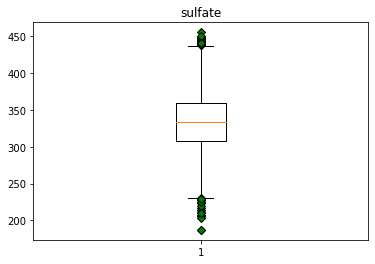

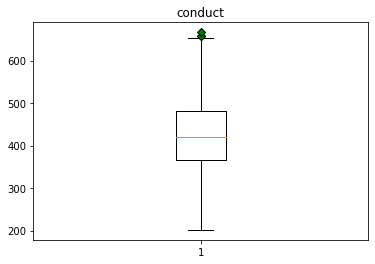

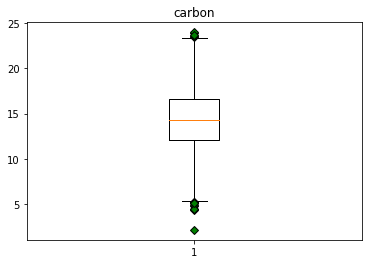

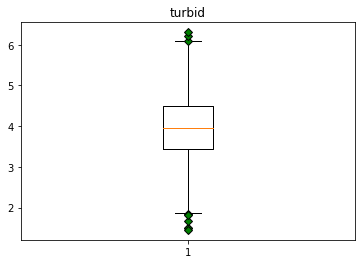

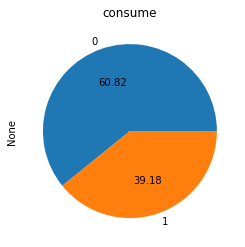

In [7]:
# visualise columns for outliers using box plot

for c in rawdata.columns:
    if c == "consume":
        rawdata.groupby(c).size().plot(kind='pie', autopct='%.2f')
    else:
        plt.boxplot(rawdata[c],flierprops=dict(markerfacecolor='g', marker='D'))
    plt.title(c)
    plt.show()
    

In [8]:
#Count outliers for each columns

Q1 = rawdata.quantile(0.25)
Q3 = rawdata.quantile(0.75)
IQR = Q3 - Q1
((rawdata < (Q1 - 1.5 * IQR)) | (rawdata > (Q3 + 1.5 * IQR))).sum()



ph          108
hardness     60
tds          21
cl           33
thm          19
sulfate      34
conduct       3
carbon       16
turbid        9
consume       0
dtype: int64

|Column|Number of outliers outside IQR|
|-|-|
|ph       |  108|
|hardness |   60|
|tds      |   21|
|cl       |   33|
|thm      |   19|
|sulfate  |   34|
|conduct  |    3|
|carbon   |   16|
|turbid   |    9|
|consume  |    0|


The output above shows the number of rows that fall outside the the interquartile range for each column. These outliers will be ommited.

We can clearly see that the 'consume' column will not be affected.

In [9]:
import numpy as np
mask = ((rawdata < (Q1 - 1.5 * IQR)) | (rawdata > (Q3 + 1.5 * IQR)))
rawdata[mask] = np.nan
before = rawdata.shape[0]
rawdata.dropna(inplace=True)
after = rawdata.shape[0]
print(((rawdata < (Q1 - 1.5 * IQR)) | (rawdata > (Q3 + 1.5 * IQR))).sum())
print(f"Rows removed: {before-after}")


ph          0
hardness    0
tds         0
cl          0
thm         0
sulfate     0
conduct     0
carbon      0
turbid      0
consume     0
dtype: int64
Rows removed: 271


There are no missing values now.<br>
All 271 rows of outliers outside the interquartile range have been removed.


In [10]:
rawdata.reset_index(drop=True, inplace=True)  # reset index

rawdata.shape

cleaned_dataset = rawdata

The clean dataset now has 2,164 rows with the original 10 columns.

### FEATURE ENGINEERING/SELECTION

New fetuers will be engneered from existing numeric columns using 'Interaction' methods.<br>
All continuous numeric columns will be scaled using Robust Scaling.<br>
This is done to bring all values down to as small a range as possible which is preferrable for SVM modelling.

In [11]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()

# class_columns = {
#     'sex': ['sex_female','sex_male'],
#     'cp': ['cp_type0','cp_type1','cp_type2','cp_type3'],
#     'fbs': ['fbs_false','fbs_true'],
#     'restecg': ['restecg_type0','restecg_type1','restecg_type2'],
#     'thal': ['thal_type0','thal_type1','thal_type2','thal_type3'],
#     'exang': ['exang_false','exang_true']
# }

# encoded = no_outliers

# for c, encodedc in class_columns.items():
#     # create feature columns as array
#     features_arr = ohe.fit_transform(no_outliers[[c]]).toarray()

#     # add to dataframe
#     encoded = pd.concat([encoded, pd.DataFrame(features_arr, columns=encodedc)], axis = 1)

# # drop original columns
# for c in class_columns.keys():
#     encoded.drop(c, axis = 1)

In [12]:
from sklearn.preprocessing import RobustScaler


rb = RobustScaler()

scaled = cleaned_dataset

columns = list(numeric_columns)

for c in numeric_columns:
    scaled[c] = rb.fit_transform(scaled[[c]])

### BEGIN MODELLING

The code below runs the model with random hyperparameters 2500 times. It records the performance of models in the `models` dataframe. <br>The next code block plots the accuracy of the models over these 2500 iterations to give an idea of overall quality of the cleaned dataset.
<br><br>
(Feel free to reduce the number of iterations `NUM_ITERATIONS` if it takes a long time. For us, 2500 takes around 10 seconds.)

In [59]:
NUM_ITERATIONS = 2500

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from random import randint, choice, uniform

# separate target from rest of data set
target = scaled['consume']
data = scaled.drop("consume", axis=1)

# record the hyperparameters and results of the best performing models
cols = ['splitsize', 'rs', 'kernel', 'degree', 'gamma', 'c', 'accuracy', 'precision', 'recall']
models = pd.DataFrame(columns=cols)

for ctr in range(NUM_ITERATIONS):
    # pick random hyperparameters
    hp = {
        'splitsize': uniform(0.2, 0.3),
        'rs': randint(1, 5000),  # random state of train-test split
        'kernel': choice(('linear', 'sigmoid')),
        'degree': randint(1, 5),
        'gamma': choice(['scale', 'auto']),
        'c': abs(uniform(1.0, 500.0))
    }

    # split data and target into train and test
    train_data, test_data, train_tgt, test_tgt = train_test_split(scaled, target, test_size=hp['splitsize'], random_state = hp['rs'])  # 30% training

    # train model
    clf = svm.SVC(kernel='sigmoid')
    clf.fit(train_data, train_tgt)

    # prediction & evaluation
    y_pred = clf.predict(test_data)
    accuracy, precision, recall = metrics.accuracy_score(test_tgt, y_pred), metrics.precision_score(test_tgt, y_pred), metrics.recall_score(test_tgt, y_pred)
    
    if (not (ctr % 100) and ctr > 0): print(f'Went through {ctr} iterations.')

    d = hp
    d['accuracy'] = accuracy
    d['precision'] = precision
    d['recall'] = recall

    models.at[str(ctr), :] = d
   

Went through 100 iterations.
Went through 200 iterations.
Went through 300 iterations.
Went through 400 iterations.
Went through 500 iterations.
Went through 600 iterations.
Went through 700 iterations.
Went through 800 iterations.
Went through 900 iterations.
Went through 1000 iterations.
Went through 1100 iterations.
Went through 1200 iterations.
Went through 1300 iterations.
Went through 1400 iterations.
Went through 1500 iterations.
Went through 1600 iterations.
Went through 1700 iterations.
Went through 1800 iterations.
Went through 1900 iterations.
Went through 2000 iterations.
Went through 2100 iterations.
Went through 2200 iterations.
Went through 2300 iterations.
Went through 2400 iterations.


The code block below illustrates distribution of accuracy of models running on different hyperparameters.<br>The graph therefore shows the overall quality of the dataset (at least for this classification model).


In any case, from the tests on our machines, the performance is amazing as is: averaging around 95% accuracy with less than 0.1 std across all iterations. 

<br>In our opinion, this is at an appropriate level. Therefore, we will not do any feature selection. 🙂

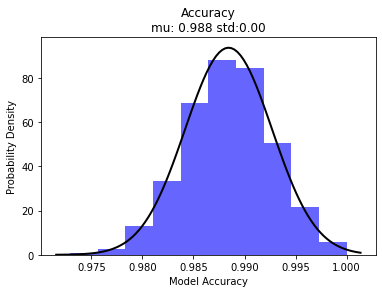

In [60]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

models = models.astype({"accuracy": float, "precision": float, "recall": float})

ac = models['accuracy']

mu, std = norm.fit(ac) 
plt.hist(ac, bins=10, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Accuracy\nmu: {:.3f} std:{:.2f}".format(mu, std)
plt.title(title)
plt.xlabel("Model Accuracy") 
plt.ylabel("Probability Density")
plt.show()